In [ ]:

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [ ]:

df = pd.read_csv("NYPD.csv")

In [ ]:
df.head()

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  ADDR_PCT_CD  \
0   10600119   01/01/2002     11:00:00   02/25/2006     11:00:00          NaN   
1   11052575   04/22/2005     02:00:00          NaN       (null)          NaN   
2   10832306   07/11/2005     20:00:00   03/29/2006     12:00:00          NaN   
3   10107192   10/19/2005     20:30:00          NaN       (null)          NaN   
4   23893731   12/04/2005     09:00:00   08/09/2006     17:00:00          NaN   

       RPT_DT  KY_CD                       OFNS_DESC  PD_CD  ... SUSP_SEX  \
0  03/06/2006    104                            RAPE  157.0  ...        M   
1  04/22/2006    110  GRAND LARCENY OF MOTOR VEHICLE  441.0  ...   (null)   
2  03/29/2006    353   UNAUTHORIZED USE OF A VEHICLE  462.0  ...        M   
3  01/13/2006    126         MISCELLANEOUS PENAL LAW  461.0  ...        F   
4  08/09/2006    109                   GRAND LARCENY  405.0  ...   (null)   

  TRANSIT_DISTRICT Latitude Longitude Lat_Lon PATROL_BORO STATION_NAME  \
0              NaN      NaN       NaN     NaN      (null)       (null)   
1              NaN      NaN       NaN     NaN      (null)       (null)   
2              NaN      NaN       NaN     NaN      (null)       (null)   
3              NaN      NaN       NaN     NaN      (null)       (null)   
4              NaN      NaN       NaN     NaN      (null)       (null)   

   VIC_AGE_GROUP VIC_RACE VIC_SEX  
0          18-24    WHITE       F  
1          25-44    BLACK       M  
2          45-64    WHITE       M  
3          25-44    BLACK       F  
4          25-44    WHITE       F  

[5 rows x 35 columns]

In [ ]:
df.dtypes

CMPLNT_NUM            object
CMPLNT_FR_DT          object
CMPLNT_FR_TM          object
CMPLNT_TO_DT          object
CMPLNT_TO_TM          object
ADDR_PCT_CD          float64
RPT_DT                object
KY_CD                  int64
OFNS_DESC             object
PD_CD                float64
PD_DESC               object
CRM_ATPT_CPTD_CD      object
LAW_CAT_CD            object
BORO_NM               object
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
JURIS_DESC            object
JURISDICTION_CODE      int64
PARKS_NM              object
HADEVELOPT            object
HOUSING_PSA           object
X_COORD_CD            object
Y_COORD_CD            object
SUSP_AGE_GROUP        object
SUSP_RACE             object
SUSP_SEX              object
TRANSIT_DISTRICT     float64
Latitude             float64
Longitude            float64
Lat_Lon               object
PATROL_BORO           object
STATION_NAME          object
VIC_AGE_GROUP         object
VIC_RACE              object
VIC_SEX       

In [ ]:
#See the percentege of missing values in each variable
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

TRANSIT_DISTRICT     99.656720
CMPLNT_TO_DT         25.059414
Longitude             0.519320
ADDR_PCT_CD           0.519320
Lat_Lon               0.519320
X_COORD_CD            0.510518
Y_COORD_CD            0.510518
Latitude              0.510518
PD_CD                 0.026406
VIC_SEX               0.008802
PATROL_BORO           0.008802
STATION_NAME          0.008802
VIC_AGE_GROUP         0.008802
VIC_RACE              0.008802
HADEVELOPT            0.000000
SUSP_SEX              0.000000
SUSP_RACE             0.000000
SUSP_AGE_GROUP        0.000000
HOUSING_PSA           0.000000
CMPLNT_NUM            0.000000
PARKS_NM              0.000000
CMPLNT_FR_DT          0.000000
JURIS_DESC            0.000000
PREM_TYP_DESC         0.000000
LOC_OF_OCCUR_DESC     0.000000
BORO_NM               0.000000
LAW_CAT_CD            0.000000
CRM_ATPT_CPTD_CD      0.000000
PD_DESC               0.000000
OFNS_DESC             0.000000
KY_CD                 0.000000
RPT_DT                0.000000
CMPLNT_T

Data cleaning

In [ ]:
#dropping rows with NaN values
df.dropna(subset=['Y_COORD_CD','X_COORD_CD','Latitude','Longitude','CRM_ATPT_CPTD_CD','CMPLNT_FR_TM','Lat_Lon','CMPLNT_FR_DT','BORO_NM','OFNS_DESC'], inplace=True)

#dropping columns that are not significant for future data exploration
df.drop(['PARKS_NM','STATION_NAME','TRANSIT_DISTRICT','HADEVELOPT','HOUSING_PSA'],axis='columns', inplace=True)

df.drop(['SUSP_AGE_GROUP','JURISDICTION_CODE'], axis='columns', inplace=True)

df.drop(['ADDR_PCT_CD','PD_CD','PD_DESC','PATROL_BORO','CMPLNT_TO_DT','CMPLNT_TO_TM'], axis='columns', inplace=True)

#replacing all NaN values in 'LOC_OF_OCCUR_DESC' with UNKNOWN
df.fillna({'LOC_OF_OCCUR_DESC':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_RACE' with UNKNOWN
df.fillna({'VIC_RACE':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_AGE_GROUP' with UNKNOWN
df.fillna({'VIC_AGE_GROUP':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_SEX' with UNKNOWN
df.fillna({'VIC_SEX':'UNKNOWN'}, inplace=True)

print('Clean dataset: ')
print("Observations: ", df.shape[0])
print("Variables: ", df.shape[1])

#examing the changes
df.head(5)


Clean dataset: 
Observations:  11302
Variables:  22


CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM      RPT_DT  KY_CD  \
17   10361314   02/11/2006     16:35:00  02/11/2006    344   
18   10363948   02/11/2006     17:15:00  02/11/2006    578   
20   16719307   02/15/2006     00:01:00  06/08/2006    104   
44   16939015   05/30/2006     19:00:00  06/29/2006    104   
45   27139650   12/15/2006     21:12:00  02/27/2007    114   

                       OFNS_DESC CRM_ATPT_CPTD_CD   LAW_CAT_CD   BORO_NM  \
17  ASSAULT 3 & RELATED OFFENSES        COMPLETED  MISDEMEANOR  BROOKLYN   
18                 HARRASSMENT 2        COMPLETED    VIOLATION  BROOKLYN   
20                          RAPE        COMPLETED       FELONY     BRONX   
44                          RAPE        COMPLETED       FELONY     BRONX   
45                         ARSON        COMPLETED       FELONY  BROOKLYN   

   LOC_OF_OCCUR_DESC  ... X_COORD_CD Y_COORD_CD SUSP_RACE SUSP_SEX   Latitude  \
17            (null)  ...    999,496    190,300    (null)   (null)  40.689001   
18            INSIDE  ...  1,007,052    193,757     BLACK        M  40.698474   
20            INSIDE  ...  1,017,478    256,069    (null)   (null)  40.869470   
44            INSIDE  ...  1,006,490    244,533   UNKNOWN        M  40.837842   
45           REAR OF  ...  1,007,052    193,757    (null)   (null)  40.698474   

    Longitude                                Lat_Lon  VIC_AGE_GROUP VIC_RACE  \
17 -73.945027    (40.68900139556, -73.9450265328727)          45-64    BLACK   
18 -73.917769   (40.6984738177025, -73.917768981221)          18-24    BLACK   
20 -73.879861  (40.8694704770483, -73.8798608037303)            <18    BLACK   
44 -73.919628  (40.8378421209284, -73.9196277517392)            <18    BLACK   
45 -73.917769   (40.6984738177025, -73.917768981221)         (null)  UNKNOWN   

   VIC_SEX  
17       F  
18       F  
20       F  
44       F  
45       M  

[5 rows x 22 columns]

In [ ]:
df.OFNS_DESC.unique()

array(['ASSAULT 3 & RELATED OFFENSES', 'HARRASSMENT 2', 'RAPE', 'ARSON',
       'GRAND LARCENY', 'ROBBERY', 'FORGERY', 'SEX CRIMES',
       'DANGEROUS DRUGS', 'BURGLARY', '(null)',
       'MURDER & NON-NEGL. MANSLAUGHTER', 'MISCELLANEOUS PENAL LAW',
       'DANGEROUS WEAPONS', 'OFF. AGNST PUB ORD SENSBLTY &',
       'THEFT-FRAUD', 'PETIT LARCENY', 'FRAUDS', 'FELONY ASSAULT',
       'CRIMINAL MISCHIEF & RELATED OF', 'POSSESSION OF STOLEN PROPERTY',
       'GRAND LARCENY OF MOTOR VEHICLE', 'OTHER OFFENSES RELATED TO THEF',
       'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES INVOLVING FRAUD',
       'UNAUTHORIZED USE OF A VEHICLE', 'VEHICLE AND TRAFFIC LAWS',
       'KIDNAPPING & RELATED OFFENSES', 'CRIMINAL TRESPASS',
       'NYS LAWS-UNCLASSIFIED FELONY', 'INTOXICATED & IMPAIRED DRIVING',
       'PETIT LARCENY OF MOTOR VEHICLE', 'OTHER STATE LAWS (NON PENAL LA',
       'ADMINISTRATIVE CODE', 'OFFENSES AGAINST THE PERSON',
       'CHILD ABANDONMENT/NON SUPPORT', "BURGLAR'S TOOLS",
       

In [ ]:
df_clean = df.replace({'HARRASSMENT 2': 'HARASSMENT',
                'ESCAPE 3': 'ESCAPE',
                'ASSAULT 3 & RELATED OFFENSES': 'ASSAULT & RELATED OFFENSES',
                'CRIMINAL MISCHIEF & RELATED OF': 'CRIMINAL MISCHIEF',
                'OFF. AGNST PUB ORD SENSBLTY &': 'OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION',
                'OTHER STATE LAWS (NON PENAL LA': 'OTHER STATE LAWS (NON PENAL LAW)',
                'ENDAN WELFARE INCOMP': 'ENDANGERING WELFARE OF INCOMPETENT',
                'AGRICULTURE & MRKTS LAW-UNCLASSIFIED': 'AGRICULTURE & MARKETS LAW',
                'DISRUPTION OF A RELIGIOUS SERV': 'DISRUPTION OF A RELIGIOUS SERVICE',
                'LOITERING/GAMBLING (CARDS, DIC': 'GAMBLING',
                'OFFENSES AGAINST MARRIAGE UNCL': 'OFFENSES AGAINST MARRIAGE',
                'HOMICIDE-NEGLIGENT,UNCLASSIFIE': 'HOMICIDE-NEGLIGENT',
                                      'E': 'UNKNOWN',
                                      'D': 'BUSINESS/ORGANIZATION',
                                      'F': 'FEMALE',
                                      'M': 'MALE'}).copy()

In [ ]:
df_clean.OFNS_DESC.unique()

array(['ASSAULT & RELATED OFFENSES', 'HARASSMENT', 'RAPE', 'ARSON',
       'GRAND LARCENY', 'ROBBERY', 'FORGERY', 'SEX CRIMES',
       'DANGEROUS DRUGS', 'BURGLARY', '(null)',
       'MURDER & NON-NEGL. MANSLAUGHTER', 'MISCELLANEOUS PENAL LAW',
       'DANGEROUS WEAPONS',
       'OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION', 'THEFT-FRAUD',
       'PETIT LARCENY', 'FRAUDS', 'FELONY ASSAULT', 'CRIMINAL MISCHIEF',
       'POSSESSION OF STOLEN PROPERTY', 'GRAND LARCENY OF MOTOR VEHICLE',
       'OTHER OFFENSES RELATED TO THEF', 'OFFENSES AGAINST PUBLIC ADMINI',
       'OFFENSES INVOLVING FRAUD', 'UNAUTHORIZED USE OF A VEHICLE',
       'VEHICLE AND TRAFFIC LAWS', 'KIDNAPPING & RELATED OFFENSES',
       'CRIMINAL TRESPASS', 'NYS LAWS-UNCLASSIFIED FELONY',
       'INTOXICATED & IMPAIRED DRIVING', 'PETIT LARCENY OF MOTOR VEHICLE',
       'OTHER STATE LAWS (NON PENAL LAW)', 'ADMINISTRATIVE CODE',
       'OFFENSES AGAINST THE PERSON', 'CHILD ABANDONMENT/NON SUPPORT',
       "BURGLAR'S TOOLS", '

Exploratory Analysis

1. Types of Crimes

In [ ]:
#types of crimes (top 10)
df_clean.OFNS_DESC.value_counts().iloc[:10]

GRAND LARCENY                                   2548
THEFT-FRAUD                                     2064
SEX CRIMES                                      1431
PETIT LARCENY                                    880
FRAUDS                                           661
RAPE                                             649
OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION     645
HARASSMENT                                       637
CRIMINAL MISCHIEF                                364
ASSAULT & RELATED OFFENSES                       268
Name: OFNS_DESC, dtype: int64

<Axes: title={'center': 'Types of Crimes'}>

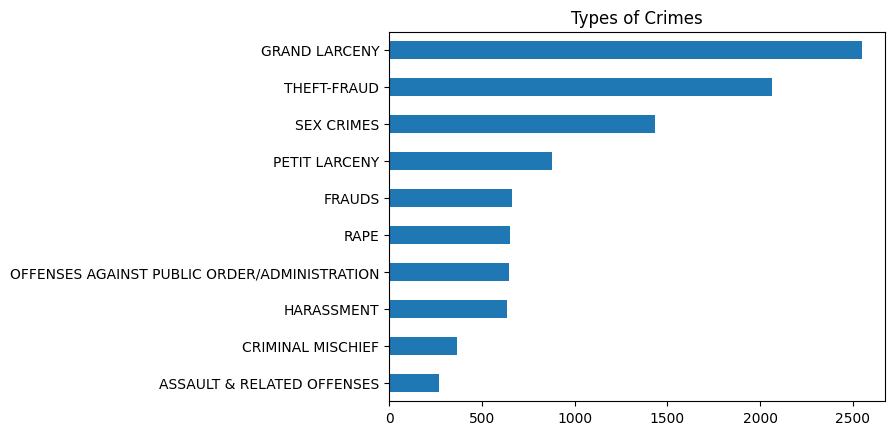

In [ ]:
df_clean.OFNS_DESC.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Types of Crimes")

array([<Axes: ylabel='LAW_CAT_CD'>], dtype=object)

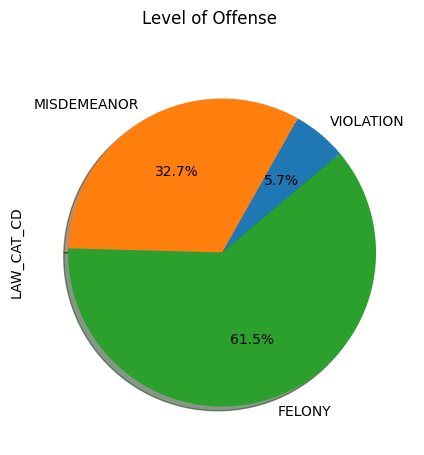

In [ ]:
df_clean['LAW_CAT_CD'].value_counts().sort_values().plot(kind='pie', subplots=True, shadow = True,startangle=40,
figsize=(10,5), autopct='%1.1f%%', title = 'Level of Offense')

2. Distribution of crimes over the years, months and days

<Axes: title={'center': 'Total Crime Events by Year'}>

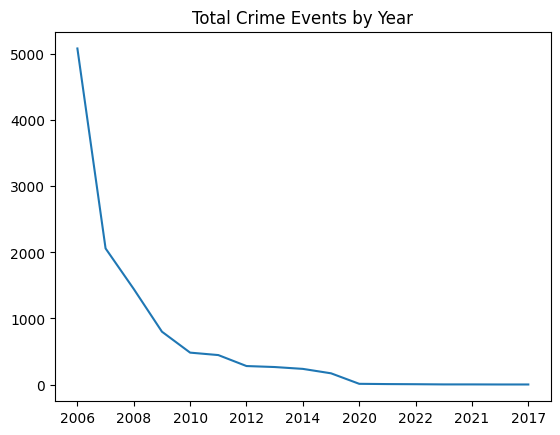

In [ ]:
df_clean['year'] = df_clean['RPT_DT'].str.findall(r'(\d{4})').apply(lambda x: x[0])
df_clean['year'].value_counts().plot(kind="line", title = "Total Crime Events by Year")

<Axes: title={'center': 'Total Crime Events by Month'}, xlabel='month'>

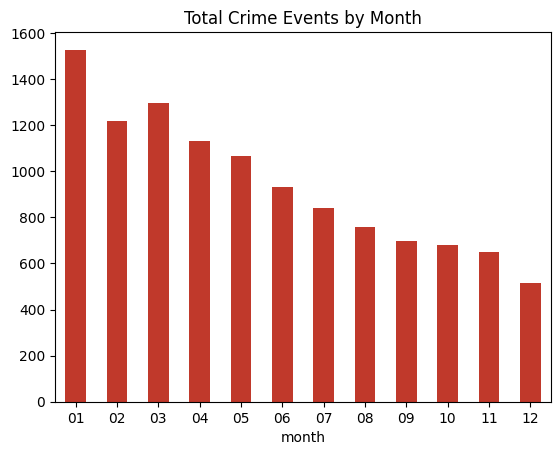

In [ ]:
#reports by month
df_clean['month'] = df_clean['RPT_DT'].str.findall('(\d{2})').apply(lambda x: x[0])
df_clean.groupby('month').size().plot(kind = 'bar', title ='Total Crime Events by Month', color = '#C0392B',rot=0)

#descending order
#df['month'].value_counts().plot(kind="bar", xlabel = "months", ylabel = "reports", rot=0)

<Axes: title={'center': 'Total Crime Events by Day'}, xlabel='hours'>

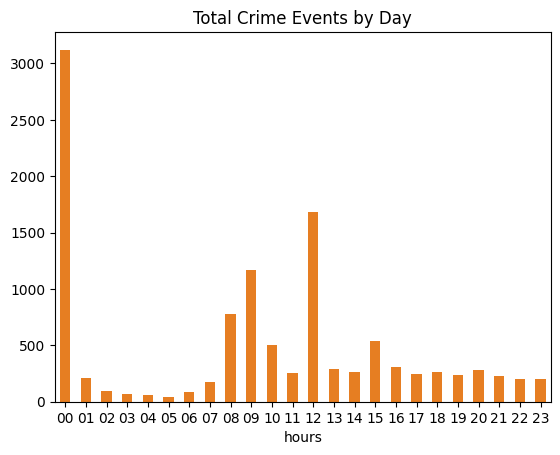

In [ ]:
#reports by hour
df_clean['time'] = df_clean['CMPLNT_FR_TM'].str.findall('(\d{2})').apply(lambda x: x[0])
df_clean.groupby('time').size().plot(kind = 'bar', title ='Total Crime Events by Day', color = '#E67E22', xlabel = 'hours',rot=0)

#descending order
#df['time'].value_counts().plot(kind="bar", xlabel = "hours", ylabel = "reports", rot=0)

3.  Distribution of Crime in each borough

<Axes: title={'center': 'Total of Crime Events by Borough'}>

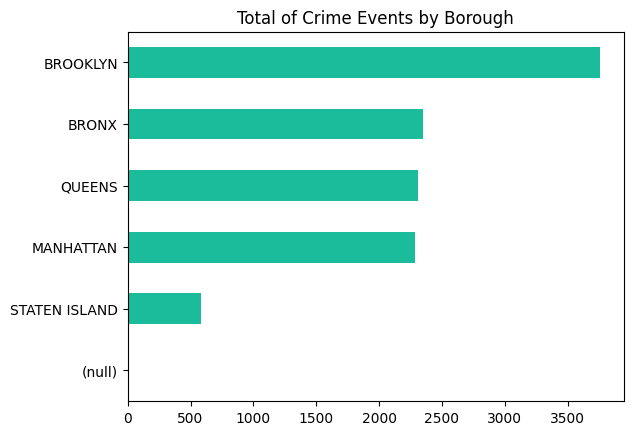

In [ ]:
df_clean['BORO_NM'].value_counts().sort_values().plot(kind="barh", color = '#1ABC9C', title = 'Total of Crime Events by Borough')


4. Analyzing a Specific Crime

In [ ]:
sex_crimes = df_clean[df.OFNS_DESC.str.contains('SEX CRIMES|RAPE')]
sex_crimes.head()


CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM      RPT_DT  KY_CD   OFNS_DESC  \
20   16719307   02/15/2006     00:01:00  06/08/2006    104        RAPE   
44   16939015   05/30/2006     19:00:00  06/29/2006    104        RAPE   
47   34631321   08/04/2007     05:00:00  09/19/2007    104        RAPE   
49   61229622   04/07/2009     05:00:00  04/27/2009    104        RAPE   
54   76569662   02/12/2010     06:30:00  12/21/2010    233  SEX CRIMES   

   CRM_ATPT_CPTD_CD   LAW_CAT_CD BORO_NM LOC_OF_OCCUR_DESC  ... SUSP_SEX  \
20        COMPLETED       FELONY   BRONX            INSIDE  ...   (null)   
44        COMPLETED       FELONY   BRONX            INSIDE  ...     MALE   
47        COMPLETED       FELONY   BRONX            INSIDE  ...     MALE   
49        COMPLETED       FELONY   BRONX            INSIDE  ...     MALE   
54        COMPLETED  MISDEMEANOR   BRONX            INSIDE  ...     MALE   

     Latitude  Longitude                                Lat_Lon VIC_AGE_GROUP  \
20  40.869470 -73.879861  (40.8694704770483, -73.8798608037303)           <18   
44  40.837842 -73.919628  (40.8378421209284, -73.9196277517392)           <18   
47  40.810352 -73.924942   (40.8103518634571, -73.924942325642)           <18   
49  40.844157 -73.900605  (40.8441566000203, -73.9006054489734)         25-44   
54  40.816206 -73.896001  (40.8162058439227, -73.8960011932583)         25-44   

   VIC_RACE  VIC_SEX  year month time  
20    BLACK   FEMALE  2006    06   00  
44    BLACK   FEMALE  2006    06   19  
47    BLACK   FEMALE  2007    09   05  
49    BLACK   FEMALE  2009    04   05  
54    BLACK   FEMALE  2010    12   06  

[5 rows x 25 columns]

In [ ]:
sex_crimes.shape

(2080, 25)

Analyzing Time

148.57


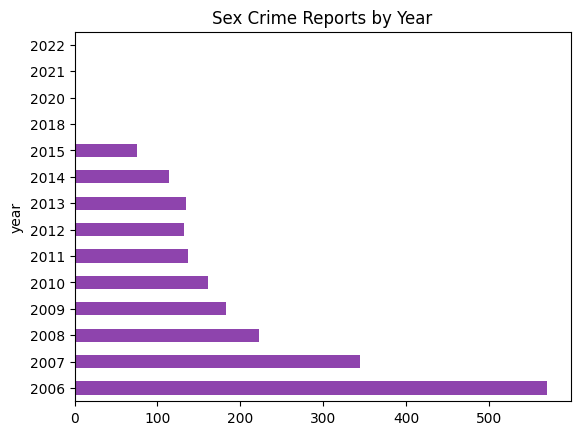

In [ ]:
#plot graph
sex_crimes.groupby('year').size().plot(kind = 'barh', color = '#8E44AD', title = 'Sex Crime Reports by Year')

#average sex crimes per year
mean = sex_crimes['year'].value_counts().mean()
print(round(mean,2))

<Axes: title={'center': 'Sex Crime Reports by Hour'}, xlabel='time'>

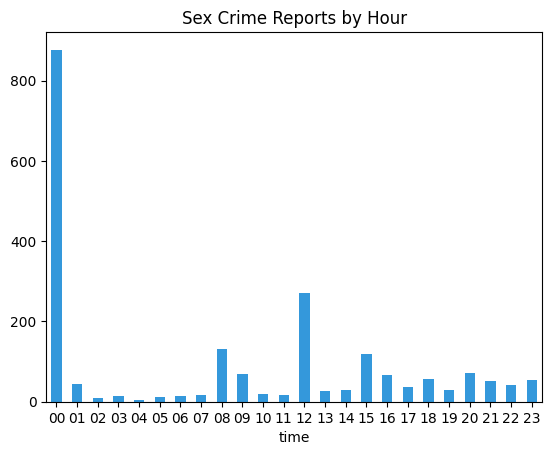

In [ ]:
#plot graph
sex_crimes.groupby('time').size().plot(kind = 'bar', color = '#3498DB', rot=0, title = 'Sex Crime Reports by Hour')

Analyzing the victims

FEMALE     86.250000
MALE       13.557692
UNKNOWN     0.192308
Name: VIC_SEX, dtype: float64


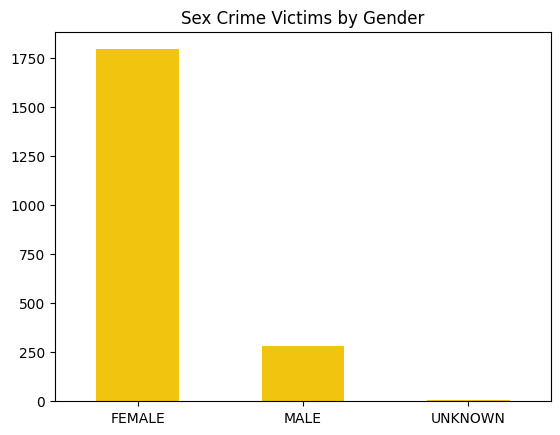

In [ ]:
#plot graph
sex_crimes['VIC_SEX'].value_counts().iloc[:3].plot(kind="bar",  color = '#F1C40F', title = 'Sex Crime Victims by Gender', rot=0)

#victims by gender percentage
vic_sex_per = sex_crimes['VIC_SEX'].value_counts() / sex_crimes['VIC_SEX'].shape[0] *100
print(vic_sex_per)

<18        72.644231
18-24      17.740385
25-44       4.278846
45-64       1.105769
UNKNOWN     0.288462
Name: VIC_AGE_GROUP, dtype: float64


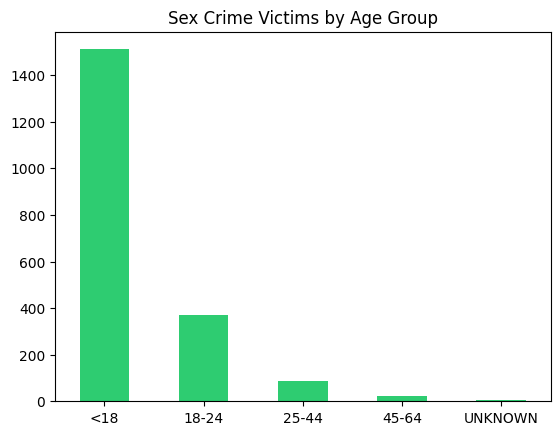

In [ ]:
#plot graph
sex_crimes['VIC_AGE_GROUP'].value_counts().iloc[[0,1,2,4,5]].plot(kind="bar", color = '#2ECC71', title = 'Sex Crime Victims by Age Group', rot=0)

#victims by age percentage
vic_age_per = sex_crimes['VIC_AGE_GROUP'].value_counts().iloc[[0,1,2,4,5]] / sex_crimes['VIC_AGE_GROUP'].shape[0] *100
print(vic_age_per)

WHITE HISPANIC                    40.432692
BLACK                             33.413462
WHITE                              9.423077
UNKNOWN                            6.923077
BLACK HISPANIC                     6.538462
ASIAN / PACIFIC ISLANDER           2.932692
AMERICAN INDIAN/ALASKAN NATIVE     0.336538
Name: VIC_RACE, dtype: float64


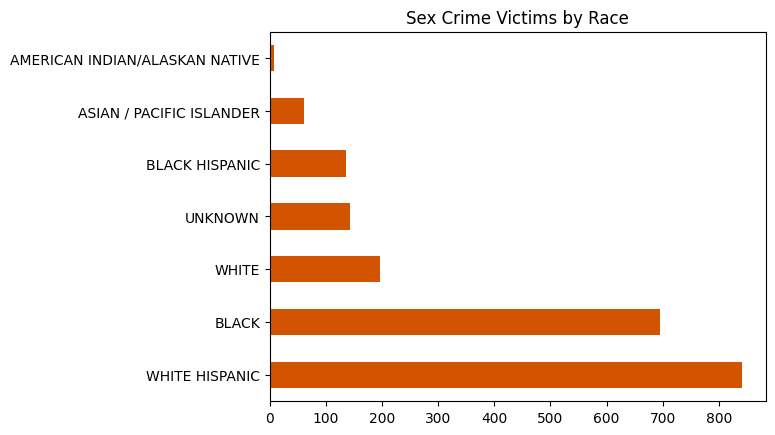

In [ ]:
#plot graph
sex_crimes['VIC_RACE'].value_counts().iloc[:7].plot(kind="barh", color = '#D35400', title = 'Sex Crime Victims by Race')

#victims by race percentage
vic_race_per = sex_crimes['VIC_RACE'].value_counts().iloc[:7] / sex_crimes['VIC_RACE'].shape[0] *100
print(vic_race_per)


KNN ----

In [ ]:
#define a function to calculate the Euclidean Distance

import math
def euclideandistance(instance1,instance2,length):
    distance=0
    for x in range(1,length):
        #print(instance1[x],instance2[x])
        distance+=pow((instance1[x]-instance2[x]),2)
        #print(distance)
    return math.sqrt(distance)

In [ ]:
#write a function to find the neighbourhood
import operator

def getneighborhood(trainingdata,testinstance,k):
    distance=[]
    length=len(testinstance)
    #print("Length of testinstance:",length)
    #print("Length trainingSet",len(trainingdata))
    for x in range(len(trainingdata)):
        dist=euclideandistance(trainingdata[x],testinstance,length)
        distance.append((trainingdata[x],dist))

    distance.sort(key=operator.itemgetter(1))
    neighbor=[]
    #print(distance)
    for x in range(k):
        neighbor.append(distance[x][0])
    #print("Neighbors of the test instance",neighbor)
    return neighbor



In [ ]:
#write a function to get the output class from the neighbors
import operator

def getoutputclass(neighbors):
    outputclass={}
    for x in range(len(neighbors)):
        response=neighbors[x][0]
        if response in outputclass:
            outputclass[response]+=1
        else:
            outputclass[response]=1
    sortedclass=sorted(outputclass.items(), key=operator.itemgetter(1),reverse=True)
    #print("Class for the test instance",outputclass.items())
    return sortedclass[0][0]

In [ ]:
def getaccuracy(testinstance, prediction):
    correct=0
#     print("Test instance in Accuracy",testinstance)
#     print("Test instance 19",testinstance[19])
#     print("Prediction",prediction)
    for x in range(len(testinstance)):
        if testinstance[x][0] == prediction[x]:
            correct+=1
            #print(correct)
    return (correct/len(testinstance))*100

In [ ]:
#function to split the dataset into train and test

def splitdataset(dataset,trainingdata=[], testdata=[]):
    for x in range(len(dataset)):
        if x<int(len(dataset)*0.8):
            trainingdata.append(dataset[x])
        else:
            testdata.append(dataset[x])
    #print(x)

In [ ]:
sex_crimes.dtypes

CMPLNT_NUM            object
CMPLNT_FR_DT          object
CMPLNT_FR_TM          object
RPT_DT                object
KY_CD                  int64
OFNS_DESC             object
CRM_ATPT_CPTD_CD      object
LAW_CAT_CD            object
BORO_NM               object
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
JURIS_DESC            object
X_COORD_CD            object
Y_COORD_CD            object
SUSP_RACE             object
SUSP_SEX              object
Latitude             float64
Longitude            float64
Lat_Lon               object
VIC_AGE_GROUP         object
VIC_RACE              object
VIC_SEX               object
year                  object
month                 object
time                  object
dtype: object

In [ ]:
import csv
import numpy as np
import pandas as pd

def main():
    # define variables and other parameters

    trainingSet = []
    testSet = []
    dataSet = []

    # select only the relevant columns

    cols_mode = ['OFNS_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
                 'LOC_OF_OCCUR_DESC', 'JURIS_DESC', 'VIC_RACE', 'VIC_SEX','PREM_TYP_DESC','SUSP_SEX','SUSP_RACE']

    updated_df_train = sex_crimes[cols_mode]

    # check for missing values and replace by most frequent
    for col in cols_mode:
        updated_df_train[col].fillna(updated_df_train[col].value_counts().idxmax(), inplace=True)

    # create dummy variables
    dummy_df = pd.get_dummies(updated_df_train, columns=['OFNS_DESC', 'CRM_ATPT_CPTD_CD', 'BORO_NM', 'LOC_OF_OCCUR_DESC',
                                                       'JURIS_DESC', 'VIC_RACE', 'VIC_SEX','PREM_TYP_DESC','SUSP_SEX','SUSP_RACE'])

    # add rows in a list and split train and test dataset
    for index, row in dummy_df.iterrows():
        a = list(row)
        dataSet.append(a)

    # convert the data elements (except Crime label - target variable) into float type
    for i in range(len(dataSet)):
        a = dataSet[i]
        for j in range(1, len(a)):
            if type(a[j]) == str:
                a[j] = 0.0
            else:
                b = float(a[j])
                dataSet[i][j] = b

    splitdataset(dataSet, trainingSet, testSet)
    print("Training Data dimensions:", len(trainingSet), ",", len(trainingSet[0]))
    print("Test Data:", len(testSet), ",", len(testSet[0]))

    # call functions for each test row and classify the output
    # generate output
    prediction = []
    k = 5
    for x in range(len(testSet)):
        neighbors = getneighborhood(trainingSet, testSet[x], k)
        response = getoutputclass(neighbors)
        prediction.append(response)
    print("Predicted Crimes for the test dataset:", prediction[:10])
    accuracy = getaccuracy(testSet, prediction)
    print("Accuracy of the KNN model:", accuracy)

main()


Training Data dimensions: 1664 , 73
Test Data: 416 , 73
Predicted Crimes for the test dataset: ['MISDEMEANOR', 'MISDEMEANOR', 'FELONY', 'FELONY', 'MISDEMEANOR', 'FELONY', 'FELONY', 'FELONY', 'MISDEMEANOR', 'FELONY']
Accuracy of the KNN model: 70.91346153846155


CRIME HOT SPOT IDENTIFICATION

In [ ]:
import pandas as pd

# Load your crime data from CSV file
crime_data = sex_crimes

# Select relevant columns
selected_columns = ['Latitude', 'Longitude']
crime_data = crime_data[selected_columns]


In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(crime_data)


In [ ]:
# kmeans clustering

from sklearn.cluster import KMeans

k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
crime_data['Cluster'] = kmeans.fit_predict(scaled_features)


In [ ]:
import folium

# Create a map centered around the mean latitude and longitude
crime_map = folium.Map(location=[crime_data['Latitude'].mean(), crime_data['Longitude'].mean()], zoom_start=12)

# Add markers for each crime incident, color-coded by cluster
for index, row in crime_data.iterrows():
    cluster = row['Cluster']
    color = 'red' if cluster == 0 else 'blue' if cluster == 1 else 'green' if cluster == 2 else 'orange' if cluster == 3 else 'purple'
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=f'Cluster: {cluster}', icon=folium.Icon(color=color)).add_to(crime_map)

# Save the map to an HTML file
crime_map.save('crime_country_map.html')


CRIME COMPLETED REGIONS

In [ ]:
data = pd.read_csv("NYPD.csv")
data.dtypes

CMPLNT_NUM            object
CMPLNT_FR_DT          object
CMPLNT_FR_TM          object
CMPLNT_TO_DT          object
CMPLNT_TO_TM          object
ADDR_PCT_CD          float64
RPT_DT                object
KY_CD                  int64
OFNS_DESC             object
PD_CD                float64
PD_DESC               object
CRM_ATPT_CPTD_CD      object
LAW_CAT_CD            object
BORO_NM               object
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
JURIS_DESC            object
JURISDICTION_CODE    float64
PARKS_NM              object
HADEVELOPT            object
HOUSING_PSA           object
X_COORD_CD            object
Y_COORD_CD            object
SUSP_AGE_GROUP        object
SUSP_RACE             object
SUSP_SEX              object
TRANSIT_DISTRICT     float64
Latitude             float64
Longitude            float64
Lat_Lon               object
PATROL_BORO           object
STATION_NAME          object
VIC_AGE_GROUP         object
VIC_RACE              object
VIC_SEX       

In [ ]:
station = data['STATION_NAME']
boronm = data['BORO_NM']

In [ ]:
crime_data = sex_crimes
crime_data['Station'] = station
# Select relevant columns
selected_columns = ['Longitude', 'Latitude', 'CMPLNT_NUM', 'Station', 'year', 'CRM_ATPT_CPTD_CD']

# Rename columns if there are spaces in column names
crime_data.columns = crime_data.columns.str.replace(' ', '_')

# Filter rows where CRM_ATPT_CPTD_CD is "COMPLETED"
crime_data = crime_data[crime_data['CRM_ATPT_CPTD_CD'] == 'COMPLETED']

# Select the relevant columns for further processing
crime_data = crime_data[selected_columns]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(crime_data[['Longitude', 'Latitude', 'CMPLNT_NUM']])
crime_data[['Longitude', 'Latitude', 'CMPLNT_NUM']] = scaled_features


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Select features and target variable
X = crime_data[['Longitude', 'Latitude', 'CMPLNT_NUM']]
y = crime_data['Station']  # Station Name is the target variable in this case

# Initialize KNN classifier (you can adjust the number of neighbors as needed)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)


KNeighborsClassifier()

In [ ]:
import folium

# Create a map centered around the mean latitude and longitude, using 'OpenStreetMap' as the tile style
crime_map = folium.Map(location=[crime_data['Latitude'].mean(), crime_data['Longitude'].mean()], zoom_start=9, tiles='OpenStreetMap')

# Predict station names for each point and add markers to the map with different colors
station_colors = {}  # Dictionary to store unique station names and their corresponding colors
for index, row in crime_data.iterrows():
    predicted_station = knn.predict([[row['Longitude'], row['Latitude'], row['CMPLNT_NUM']]])[0]
    if predicted_station not in station_colors:
        # Generate a random color for the station if it's not already in the dictionary
        station_colors[predicted_station] = '#{:02x}{:02x}{:02x}'.format(
            np.random.randint(0, 256),
            np.random.randint(0, 256),
            np.random.randint(0, 256)
        )
    color = station_colors[predicted_station]
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=f'Station: {predicted_station}', icon=folium.Icon(color=color)).add_to(crime_map)

# Save the map to an HTML file
crime_map.save('crime_completed_regions_map.html')


K-MEANS

In [ ]:
crime_data['Boro Nm'] = df_clean['BORO_NM']
crime_data['JURIS_DESC'] = df_clean['JURIS_DESC']
crime_data['PREM_TYP_DESC'] = df_clean['PREM_TYP_DESC']

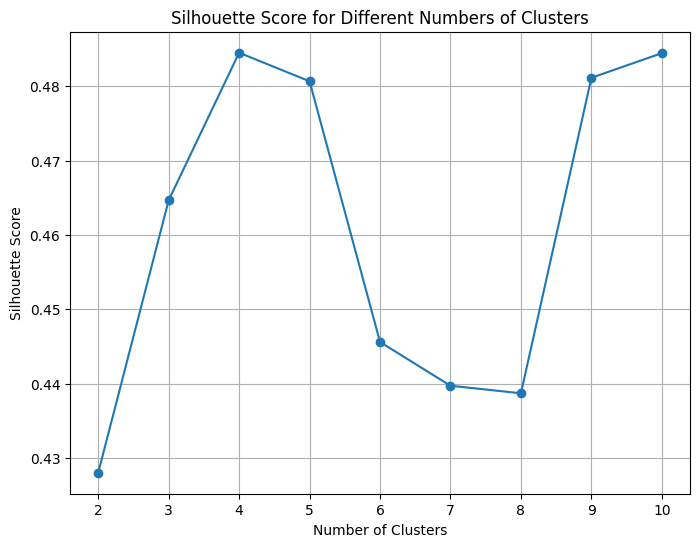

In [ ]:
from sklearn.metrics import silhouette_score, pairwise_distances
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Assuming NYPD_2020 is a pandas DataFrame containing your data

# Selecting Longitude and Latitude columns
data = crime_data[['Longitude', 'Latitude']]

# Preprocessing: Standardize the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Longitude', 'Latitude']),
    ])

# K-means clustering with a range of clusters (for example, from 2 to 10 clusters)
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = make_pipeline(preprocessor, KMeans(n_clusters=n_clusters, random_state=42))
    kmeans.fit(data)
    labels = kmeans.predict(data)
    silhouette_avg = silhouette_score(data, labels, metric='euclidean')
    silhouette_scores.append(silhouette_avg)

# Plotting silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.grid(True)
plt.show()


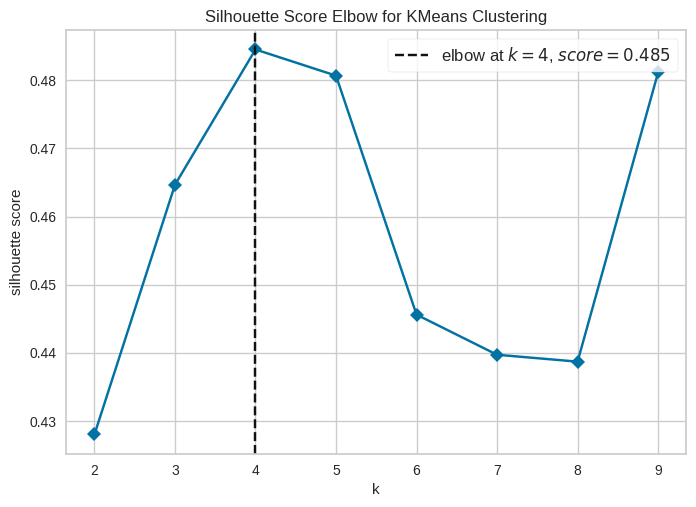

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from yellowbrick.cluster import KElbowVisualizer

# Assuming NYPD_2020 is a pandas DataFrame containing your data

# Selecting Longitude and Latitude columns
data = crime_data[['Longitude', 'Latitude']]

# Preprocessing: Standardize the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Longitude', 'Latitude']),
    ])

# Instantiate KMeans clustering algorithm
kmeans = KMeans(random_state=42)

# Using the elbow method to find the optimal number of clusters (k)
visualizer = KElbowVisualizer(kmeans, k=(2, 10), metric='silhouette', timings=False)

# Fit the visualizer to the preprocessed data
visualizer.fit(preprocessor.fit_transform(data))

# Visualize the elbow method result
visualizer.show()


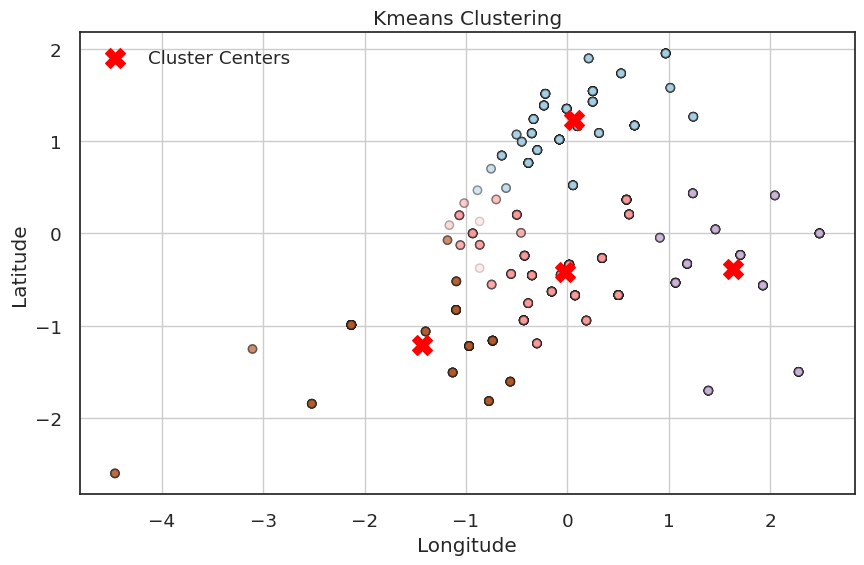

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer



# Selecting Longitude and Latitude columns
data = crime_data[['Longitude', 'Latitude']]

# Preprocessing: Standardize the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Longitude', 'Latitude']),
    ])

# K-means clustering with 10 clusters
kmeans = make_pipeline(preprocessor, KMeans(n_clusters=4, random_state=42))
kmeans.fit(data)
crime_data['Cluster'] = kmeans.predict(data)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(crime_data['Longitude'], crime_data['Latitude'], c=crime_data['Cluster'], cmap='Paired', alpha=0.2, edgecolors='k', marker='o')
plt.scatter(kmeans.named_steps['kmeans'].cluster_centers_[:, 0], kmeans.named_steps['kmeans'].cluster_centers_[:, 1], s=200, marker='X', c='red', label='Cluster Centers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Kmeans Clustering')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import folium
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Assuming crime_data is a pandas DataFrame containing your data

# Selecting Longitude and Latitude columns
data = crime_data[['Longitude', 'Latitude']]

# Preprocessing: Standardize the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Longitude', 'Latitude']),
    ])

# K-means clustering with 5 clusters
kmeans = make_pipeline(preprocessor, KMeans(n_clusters=4, random_state=42))
kmeans.fit(data)
crime_data['Cluster'] = kmeans.predict(data)

# Calculate the WCSS (Within-Cluster Sum of Squares)
wcss = kmeans.named_steps['kmeans'].inertia_
print("WCSS:", wcss)

# Create a folium map centered at the mean Latitude and Longitude
map_center = [crime_data['Latitude'].mean(), crime_data['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=8)

# Assign different colors to clusters
cluster_colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'lightblue', 'lightgreen', 'cadetblue']

# Add markers with region names
for index, row in crime_data.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=cluster_colors[row['Cluster']],
        fill=True,
        fill_color=cluster_colors[row['Cluster']],
        fill_opacity=0.6,
        parse_html=False
    ).add_to(m)

    # Add region names as pop-up labels
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Boro Nm'],  # Assuming 'BoroNm' is the correct column name
        icon=folium.Icon(color=cluster_colors[row['Cluster']])
    ).add_to(m)

# Save the map to an HTML file
m.save('cluster_map.html')


WCSS: 945.37209409193


DBSCAN

In [ ]:
pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 23.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039159 sha256=18c5fcaded03cf072609a81a917c308be087b1e302bc5bc1b6b808a96c07d9d7
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.5
    Uninstalling Cython-3.0.5:
      Successfully uninstalled Cython-3.0.5


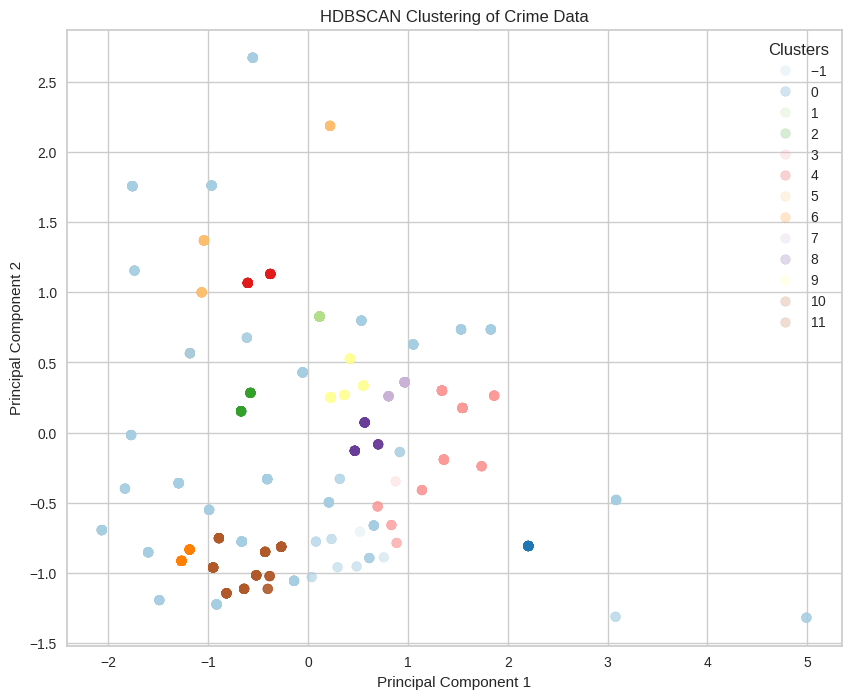

In [ ]:
import pandas as pd
import hdbscan
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming crime_data is your DataFrame containing Longitude and Latitude columns
crime_data_subset = crime_data[['Longitude', 'Latitude']]

# Apply HDBSCAN clustering
dbscan_model = hdbscan.HDBSCAN(min_cluster_size=70, metric='haversine', cluster_selection_epsilon=0.0098)
dbscan_labels = dbscan_model.fit_predict(crime_data_subset)

# Visualize the clusters using scatter plot
# Standardize the data for better visualization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(crime_data_subset)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a new DataFrame with PCA results and cluster labels
result_df = pd.DataFrame({'PC1': pca_result[:, 0], 'PC2': pca_result[:, 1], 'Cluster': dbscan_labels})

# Plot the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(result_df['PC1'], result_df['PC2'], c=result_df['Cluster'], cmap='Paired', alpha=0.2, marker='o')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('HDBSCAN Clustering of Crime Data')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import hdbscan
import folium
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming crime_data is your DataFrame containing Longitude and Latitude columns
crime_data_subset = crime_data[['Longitude', 'Latitude']]

# Apply HDBSCAN clustering
dbscan_model = hdbscan.HDBSCAN(min_cluster_size=70, metric='haversine', cluster_selection_epsilon=0.0098)
dbscan_labels = dbscan_model.fit_predict(crime_data_subset)

# Add cluster labels to the DataFrame
crime_data_subset['Cluster'] = dbscan_labels

# Convert 'Cluster' column to integers
crime_data_subset['Cluster'] = crime_data_subset['Cluster'].astype(int)

# Create a folium map centered around the mean coordinates
map_center = [crime_data_subset['Latitude'].mean(), crime_data_subset['Longitude'].mean()]
crime_map = folium.Map(location=map_center, zoom_start=10)  # Adjust the zoom level as needed

# Define a color palette for clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'darkblue', 'darkgreen', 'cadetblue', 'pink']

# Add markers for each crime incident with cluster information
for index, row in crime_data_subset.iterrows():
    cluster_color = colors[int(row['Cluster']) % len(colors)]  # Use a cyclic color palette
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color='black',
        fill=True,
        fill_color=cluster_color,
        fill_opacity=0.7,
        popup=f'Cluster: {row["Cluster"]}'
    ).add_to(crime_map)

# Save or display the map
crime_map.save('crime_map.html')  # Save the map as an HTML file
crime_map  # Display the map in Jupyter Notebook


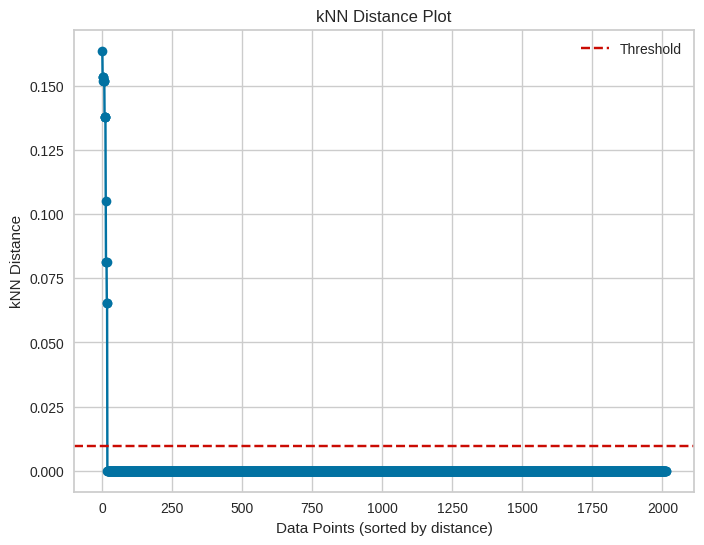

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Assuming crime_data is your DataFrame containing Longitude and Latitude columns
crime_data_subset = crime_data[['Longitude', 'Latitude']]

# Fit a k-nearest neighbors model
knn_model = NearestNeighbors(n_neighbors=5, metric='haversine')
knn_model.fit(crime_data_subset)

# Calculate distances to the k-nearest neighbors
distances, _ = knn_model.kneighbors(crime_data_subset)

# Plot kNN distances
plt.figure(figsize=(8, 6))
plt.plot(sorted(distances[:, -1], reverse=True), marker='o', linestyle='-', color='b')
plt.axhline(y=0.0098, linestyle='--', color='r', label='Threshold')
plt.xlabel('Data Points (sorted by distance)')
plt.ylabel('kNN Distance')
plt.title('kNN Distance Plot')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Assuming dbscan_labels and crime_data_subset are defined as in your previous code
silhouette_avg = silhouette_score(crime_data_subset[['Longitude', 'Latitude']], dbscan_labels)

print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.18392583627085646


MODEL BASED CLUSTERING

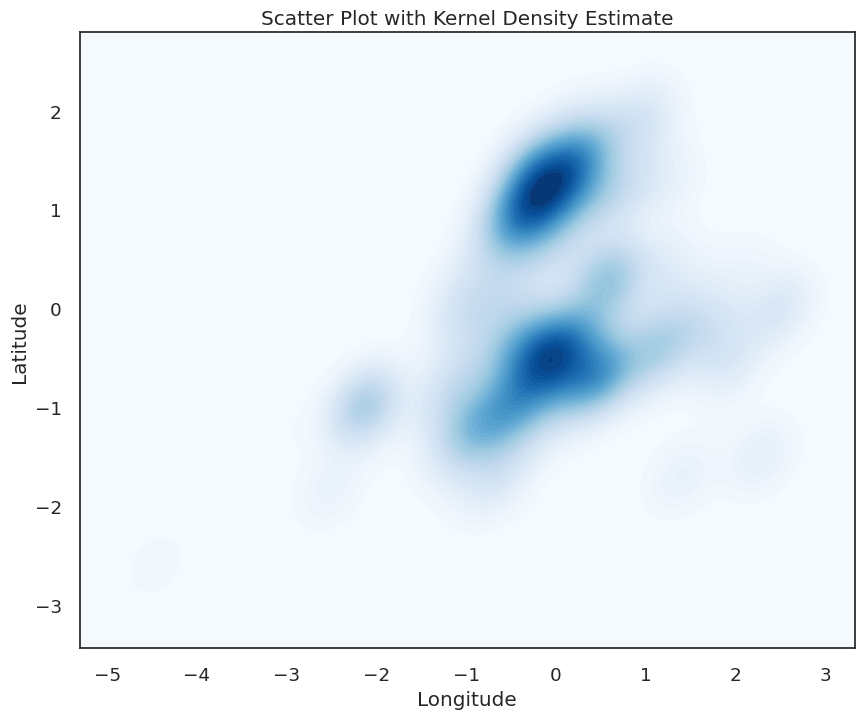

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming crime_data is your DataFrame containing Longitude and Latitude columns
crime_data_subset = crime_data[['Longitude', 'Latitude']]

# Create a scatter plot with kernel density estimate
sns.set(style="white", font_scale=1.2)
plt.figure(figsize=(10, 8))

# Use scatterplot with kernel density estimate
sns.kdeplot(data=crime_data_subset, x='Longitude', y='Latitude', fill=True, cmap='Blues', thresh=0, levels=50)

# Set plot labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot with Kernel Density Estimate')

# Adjust DPI for better resolution
plt.savefig('scatter_plot.png', dpi=300, bbox_inches='tight')
plt.show()


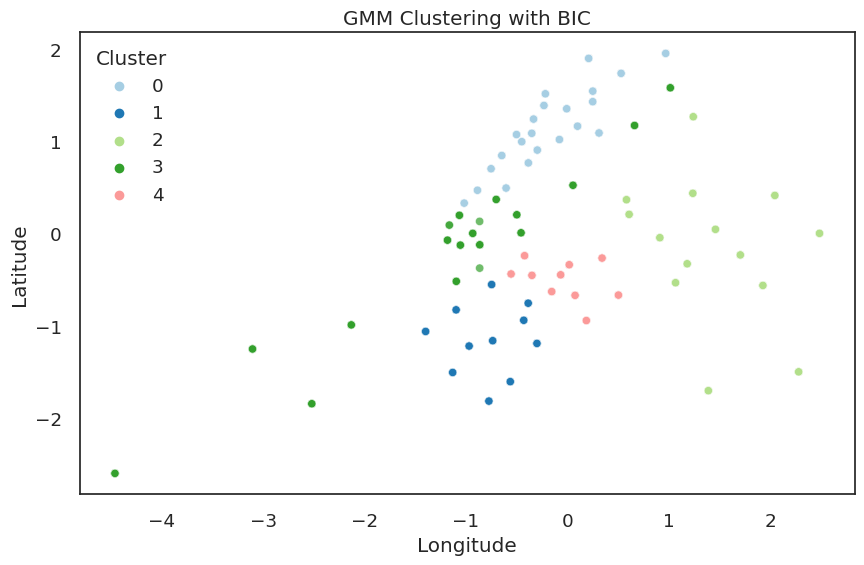

In [ ]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming crime_data is your DataFrame containing Longitude and Latitude columns
crime_data_subset = crime_data[['Longitude', 'Latitude']]

# Fit Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=42)
gmm.fit(crime_data_subset)

# Assign cluster labels to the DataFrame
crime_data_subset['Cluster'] = gmm.predict(crime_data_subset)

# Plot BIC values
plt.figure(figsize=(10, 6))
sns.scatterplot(data=crime_data_subset, x='Longitude', y='Latitude', hue='Cluster', palette='Paired', legend='full', alpha=0.7)
plt.title('GMM Clustering with BIC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


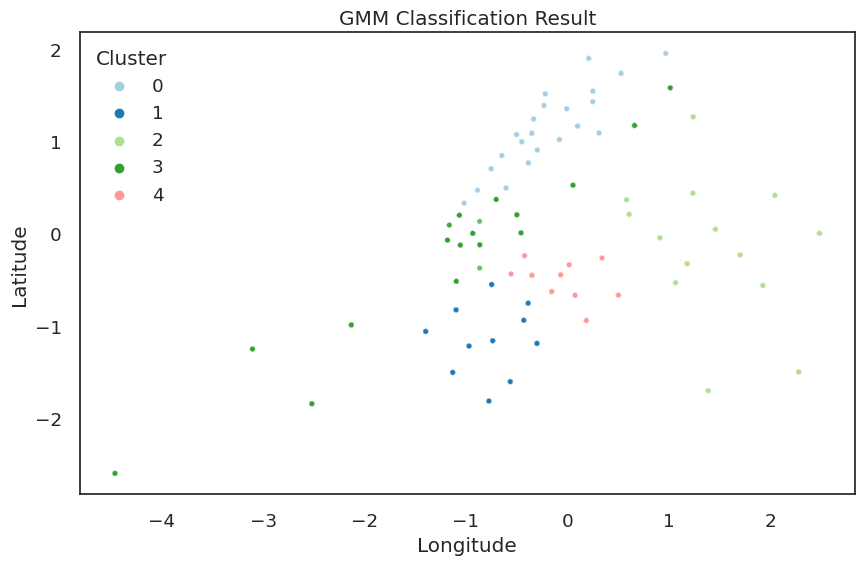

In [ ]:
# Classification: plot showing the clustering
import pandas as pd
from sklearn.mixture import GaussianMixture
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming crime_data is your DataFrame containing Longitude and Latitude columns
crime_data_subset = crime_data[['Longitude', 'Latitude']]

# Fit Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=42)
gmm.fit(crime_data_subset)

# Assign cluster labels to the DataFrame
crime_data_subset['Cluster'] = gmm.predict(crime_data_subset)

# Plot classification result
plt.figure(figsize=(10, 6))
sns.scatterplot(data=crime_data_subset, x='Longitude', y='Latitude', hue='Cluster', palette='Paired', legend='full', s=15, alpha=0.7)
plt.title('GMM Classification Result')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Assuming crime_data is your DataFrame containing Longitude, Latitude, and Cluster columns
crime_data_subset = crime_data[['Longitude', 'Latitude', 'Cluster']]

# Extract features (Longitude, Latitude) and cluster labels
X = crime_data_subset[['Longitude', 'Latitude']]
labels = crime_data_subset['Cluster']

# Compute silhouette score
silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.4845042187186489


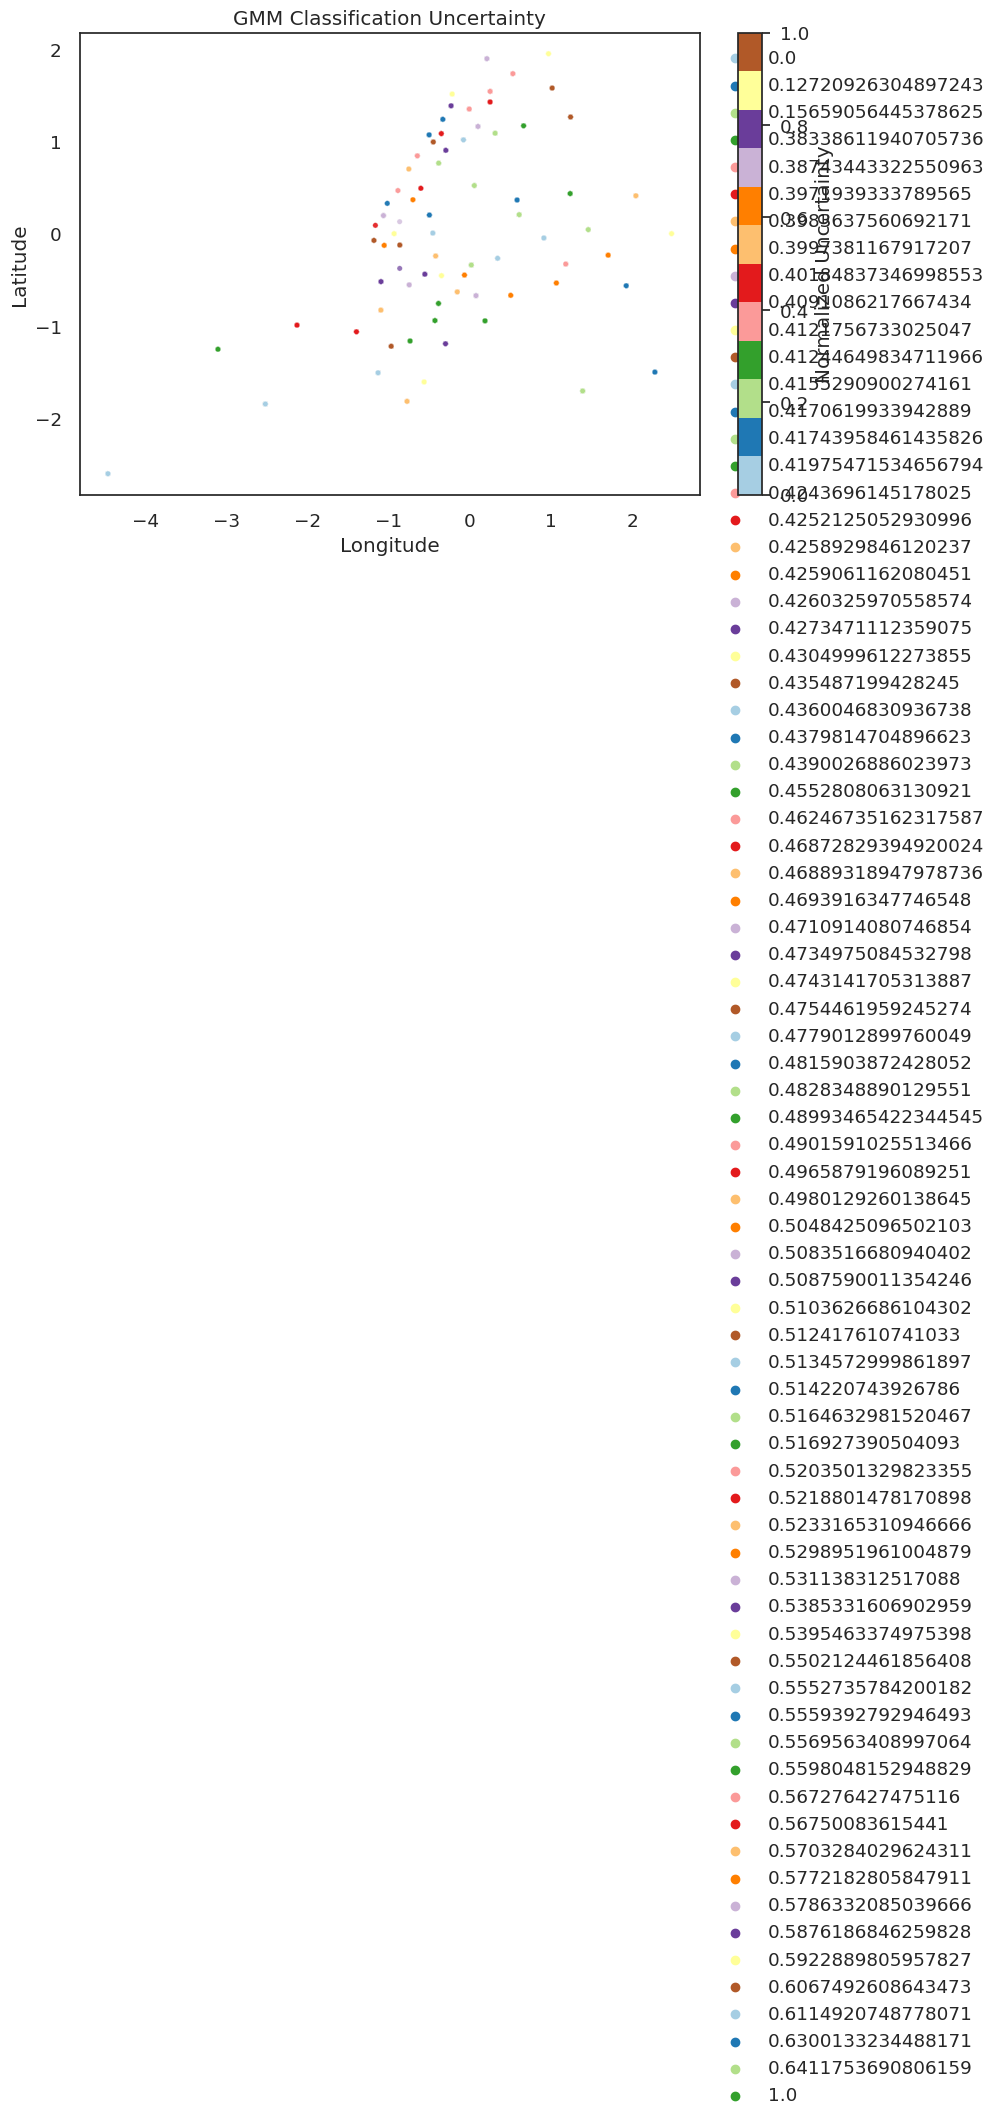

In [ ]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import Normalize, to_rgba

# Assuming crime_data is your DataFrame containing Longitude and Latitude columns
crime_data_subset = crime_data[['Longitude', 'Latitude']]

# Fit Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=10, covariance_type='full', random_state=42)
gmm.fit(crime_data_subset)

# Calculate classification uncertainty
uncertainty = -gmm.score_samples(crime_data_subset)

# Normalize uncertainty values
scaler = MinMaxScaler()
normalized_uncertainty = scaler.fit_transform(uncertainty.reshape(-1, 1)).flatten()

# Plot classification uncertainty
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=crime_data_subset, x='Longitude', y='Latitude', hue=normalized_uncertainty, palette='Paired', s=15, alpha=0.7)
plt.title('GMM Classification Uncertainty')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Create a ScalarMappable for the colorbar
norm = Normalize(vmin=normalized_uncertainty.min(), vmax=normalized_uncertainty.max())
sm = plt.cm.ScalarMappable(cmap='Paired', norm=norm)
sm.set_array([])  # fake an empty array for the scalar mappable

# Add colorbar
cbar = plt.colorbar(sm, label='Normalized Uncertainty')

# Adjust the legend position
scatter.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


For the classification  algortihms we use measures such as accuracy and for clustering algorithms we use  silhouette score as a measure of how good the model is

KNN - CLASSIFICATION:

ACCURACY -> 70.5

CLUSTERING ALGORITHMS:

KMEANS - 0.482

GMM - 0.4845

DBSCAN - 0.1834